# **Importing Modules**

In [4]:
from google.colab import drive   
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np        #imported libraries
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor



# **Importing Datasets**

In [6]:
data = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')   #imported dataset
stores = pd.read_csv('/content/drive/MyDrive/datasets/stores.csv')
features = pd.read_csv('/content/drive/MyDrive/datasets/features.csv')

**Training Dataset**

In [7]:
data.shape   #checked rows and columns

(421570, 5)

In Our Data file we have 421570 rows and 5 columns 

In [8]:
data.tail()   #last five records of dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


Here, using tail() function we get last 5 rows from dataset.

In [9]:
data.info()    # checked datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

**Dataset containing info of Stores**

In [10]:
stores.shape    #checked stores rows and columns

(45, 3)

In Our Store file we have 45 rows and 3 columns

In [11]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


Here, using tail() function we get last 5 rows from dataset.

In [12]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


**Dataset containing additional data of Stores**

In [13]:
features.shape

(8190, 12)

In Our Store file we have 8190 rows and 12 columns

In [14]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


Here, using tail() function we get last 5 rows from dataset.

In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Handling missing values of features dataset**

In [16]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)   
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

The fillna() method replaces the NULL values with a specified value. Here we replaces NULL values with median. The fillna() method returns a new DataFrame object unless the inplace parameter is set to True , in that case the fillna() method does the replacing in the original DataFrame instead.

In [17]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In above Code we replaces NULL values from MarkDown column with '0' 

In [18]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Merging Training Dataset and merged stores-features Dataset**

In [19]:
data = pd.merge(data,stores,on='Store',how='left')

In [20]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

We have total 3 files like features, store and data.
here using merge() function merge all 3 files in one data file.

In [21]:
data['Date'] = pd.to_datetime(data['Date'])  

In above code we replace Date column dtype with 'datetime'.

In [22]:
data.sort_values(by=['Date'],inplace=True)

In [23]:
data.set_index(data.Date, inplace=True)

In [24]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [25]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [26]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


# **Splitting Date Column**

In [27]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

<ipython-input-27-5a11e9e33be7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [28]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


# **Outlier Detection and Abnormalities**

**Outliers**

In [29]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [30]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data2 = store_data.copy()
del store_data

In [31]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.sort_values(by=['Date'],inplace=True)
data2.set_index(data2.Date, inplace=True)
data2.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [32]:
data2['Total_MarkDown'] = data2['MarkDown1']+data2['MarkDown2']+data2['MarkDown3']+data2['MarkDown4']+data2['MarkDown5']
data2.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

Here we merge the column (Total_MarkDoown) which they have maximum number of null value.

In [33]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']


Here we Save all numeric colums in numeric_col variable.

In [34]:
data2.shape

(421533, 20)

**Negative Weekly Sales**

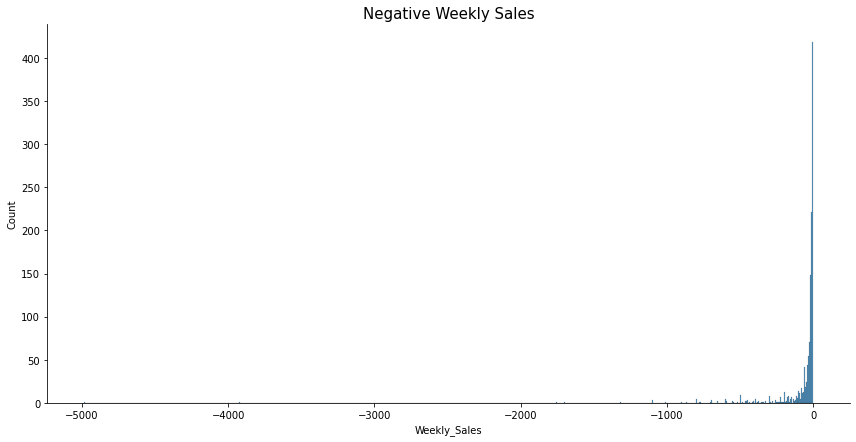

In [35]:
y = data2["Weekly_Sales"][data2.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In above graph we are checking the negative sales and delete from our dataset.

In [36]:
data2=data2[data2['Weekly_Sales']>=0]

In [37]:
data2.shape

(420254, 20)

In [38]:
data2['IsHoliday'] = data2['IsHoliday'].astype('int')

<ipython-input-38-2e563a254f16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['IsHoliday'] = data2['IsHoliday'].astype('int')


In above code we are replacing dtype bool into int.

In [39]:
data2

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


# **Data Visuallizations**

**Average Monthly Sales**

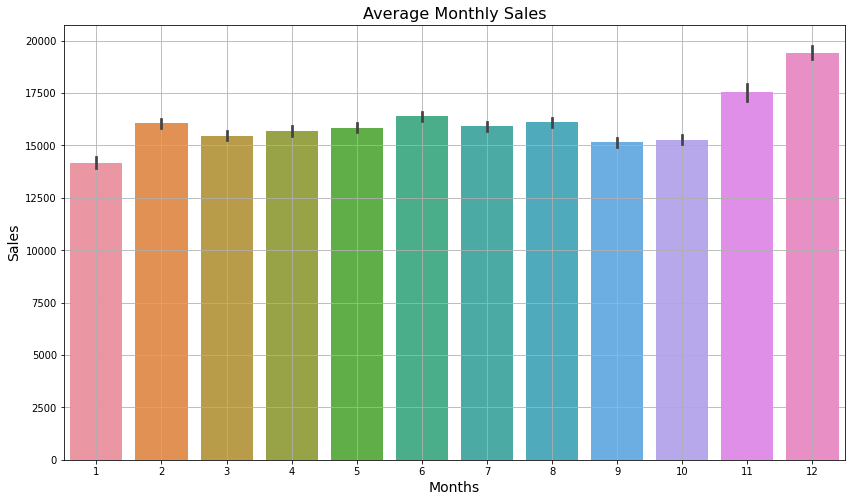

In [40]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data2)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

In above Graph, we can see average monthly sales are highest in December and lowest in January. 
When we look at the graph above, the best sales are in December and November, as expected. The 
highest values are belongs to Thankgiving holiday but when we take average it is obvious that 
December has the best value

**Monthly Sales for Each Year**

In [41]:
#BIvariate
data_monthly = pd.crosstab(data2["Year"], data2["Month"], values=data2["Weekly_Sales"],aggfunc='mean')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,16120.606404,15477.587749,15785.401871,16063.972733,16550.181770,16007.065129,16201.136071,15173.471270,14837.027476,17363.277836,19642.617689
2011,14048.348515,15904.117630,15242.627362,15400.713958,15424.052663,16263.172898,15772.449686,16082.682055,15013.965477,15536.033513,17703.690644,19215.779100
2012,14304.774064,16116.906455,15626.987004,15944.188683,16051.790678,16375.934160,15942.115851,16059.032118,15284.539107,15567.236736,NaN,NaN


**Yearly Sales**


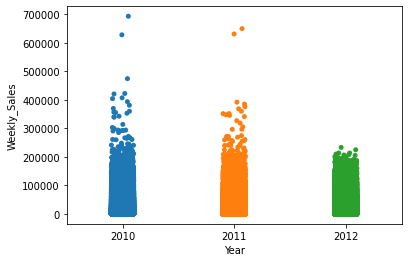

In [42]:
sns.stripplot(x='Year', y='Weekly_Sales', data=data2);


The strip plot below shows Walmart’s yearly sales by store from 2010 to 2012. Walmart’s 
sales seem to be low in 2010 and 2012 because we are missing sales data for the first month of 
2010 and the last two months of 2012. 

<Figure size 1080x432 with 0 Axes>

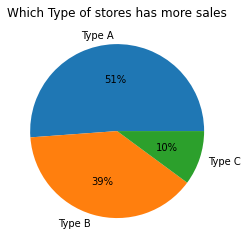

In [43]:
plt.figure(figsize=(15,6))


# Creating dataset
stores = ['Type A','Type B','Type C']

data = data2['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()


Walmart stores are classified into 3 types: A (22 stores), B (17 stores), and C (6 stores). 
Most type A stores seems to be in a group that have highest average yearly sales. Most 
type C stores appears to be in a group that have lowest average yearly sales. Most type B stores’ 
average yearly sales are higher than type C stores’ average yearly sales and lower than type A 
stores’ average yearly sales.

<AxesSubplot:xlabel='Month'>

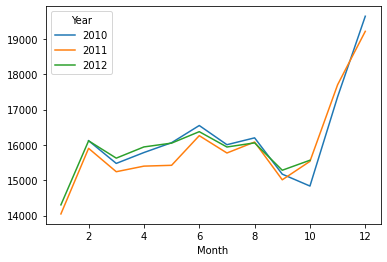

In [44]:
month_wise_sales = pd.pivot_table(data2, values = "Weekly_Sales", columns="Year", index="Month")
month_wise_sales.plot()


From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at 
the mean sales it is seen that 2010 has higher values, but 2012 has no information about November 
and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is 
near to 2010. Most probably, it will take the first place if we get 2012 results and add them. 
Walmart’s store weekly sales ranges from $209 thousand to $3.8 million. About half of the 45 
Walmart stores have weekly sales greater than or equal to $960 thousand. 


**Average Weekly Sales Store wise**

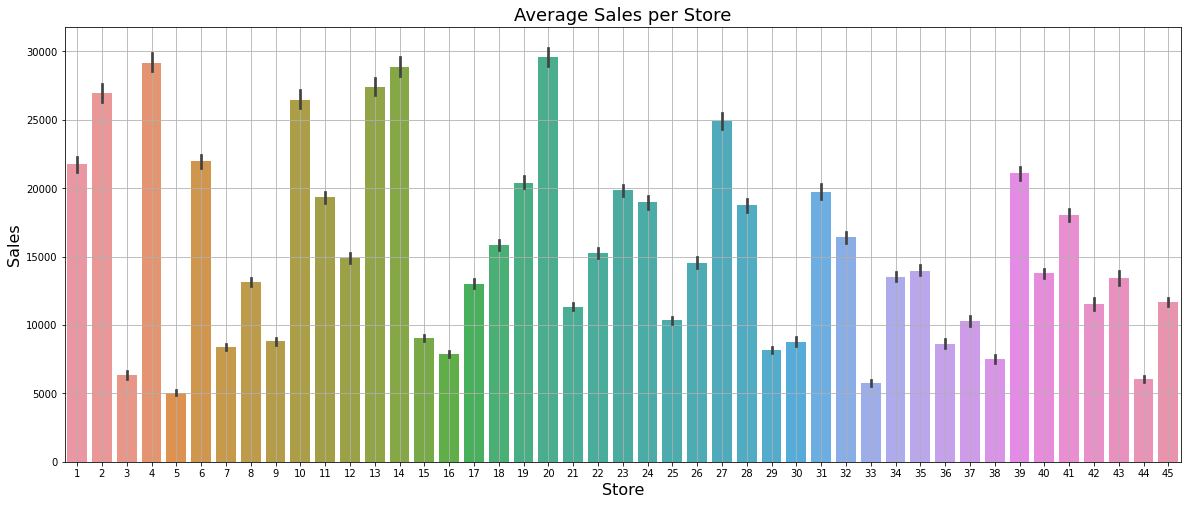

In [45]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data2)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

In above figure, we have average sales per store in which we can see top 5 stores are 20,14,4,2,13 
having maximum sales and stores 3,5,29,33,44 have lowest sales.

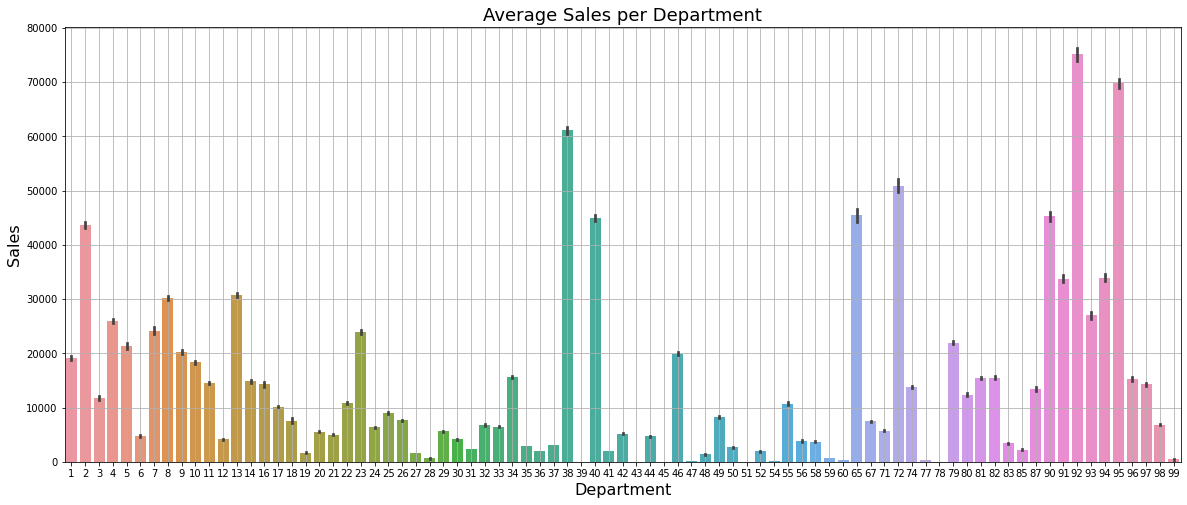

In [46]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data2)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

Here, we have average sales per department in which we can see top 5 departments are 
92,95,38,65,40 having maximum sales and departments 77,60,99,59,28 have lowest sales. 

**Sales Vs Temperature**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


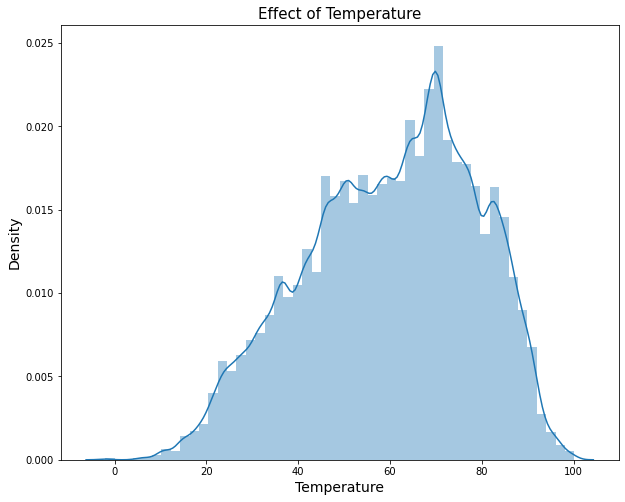

In [47]:
plt.figure(figsize=(10,8))
sns.distplot(data2['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

In this Chart, we can see that most of the sales are likely to be between 40-90o
 Fahrenheit. And 
maximum sales are near 70o
 Fahrenheit.

**Holiday Distribution**

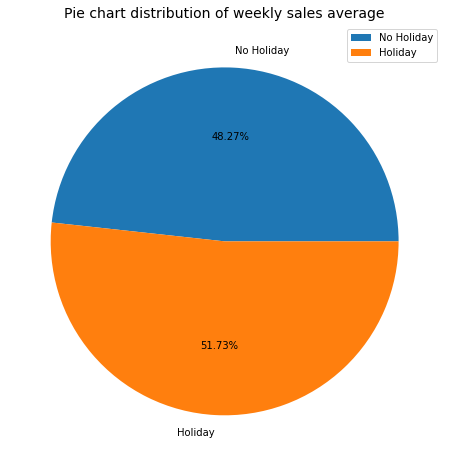

In [48]:
plt.figure(figsize=(8,8))
plt.pie(data2.groupby('IsHoliday')['Weekly_Sales'].mean(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution of weekly sales average",fontsize=14)
plt.legend()
plt.show()

As expected, holiday average sales are higher than normal date

# **Correlation between features of dataset**

In [49]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']

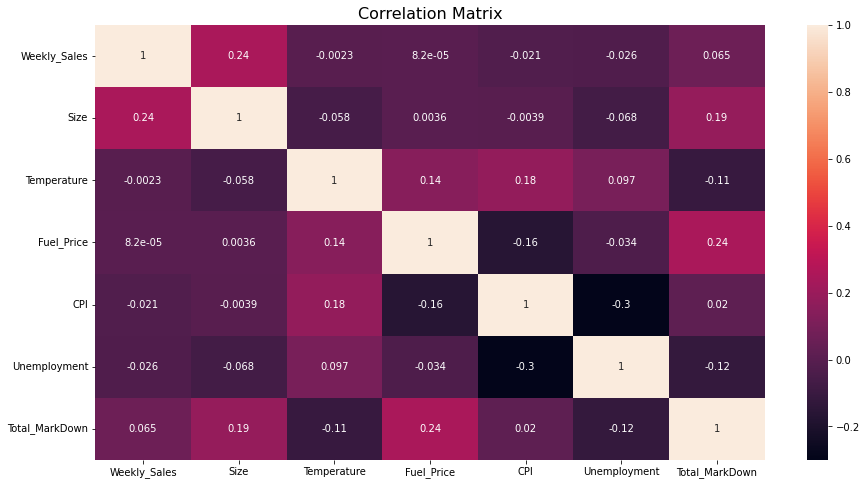

In [50]:
plt.figure(figsize=(15,8))
corr = data2[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

The heatmap bellow shows that there is not a strong correlation between the following variables:

1. Store weekly sales and temperature 
2. Store weekly sales and fuel price 
3. Store weekly sales and CPI 
4. Store weekly sales and unemployment 
5. Store weekly sales and weekly markd

---



---



# **One-hot-encoding**

In [51]:
cat_col = ['Store','Dept','Type']
data_cat = data2[cat_col].copy()

Here we save all Categorical columns in cat_col variable  

In [52]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [53]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [54]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
data2.shape

(420254, 20)

In [56]:
data2 = pd.concat([data2, data_cat],axis=1)

In [57]:
data2.shape

(420254, 149)

After convert categorical data into dummy or indicator variables. We have 149 columns.

In [58]:
data2.drop(columns=cat_col,inplace=True)

In [59]:
data2.drop(columns=['Date'],inplace=True)

In [60]:
data2.shape

(420254, 145)

# **Data Normalization**

Normalization is one of the most frequently used data preparation techniques, which helps us to change the values of numeric columns in the dataset to use a common scale.

In [61]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [62]:
data2.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [63]:
data2 = normalization(data2.copy(),num_col)

In [64]:
data2.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.035961,0.630267,0.434149,0.0501,0.840500,0.405118,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.000964,0.492338,0.392074,0.0501,0.875680,0.243052,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.001001,0.492338,0.392074,0.0501,0.875680,0.243052,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.012487,0.650636,0.354207,0.0501,0.873861,0.231934,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.016049,0.492338,0.392074,0.0501,0.875680,0.243052,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


# **Data Splitted into Training, Testing**

In [65]:
X = data2.drop(['Weekly_Sales'],axis=1)
Y = data2.Weekly_Sales

In [66]:
X.shape

(420254, 144)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# **Linear Regression Model**

Linear regression analysis is used to predict the value of a variable based on the value of another 
variable. The variable you want to predict is called the dependent variable. The variable you are 
using to predict the other variable's value is called the independent variable. 

In [68]:
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [69]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  89.92628246778904


In [70]:
y_pred = lr.predict(X_test)

In [71]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.004054428681034901
MSE 0.00010902106001547306
RMSE 0.010441315052016823
R2 0.8992664352935821


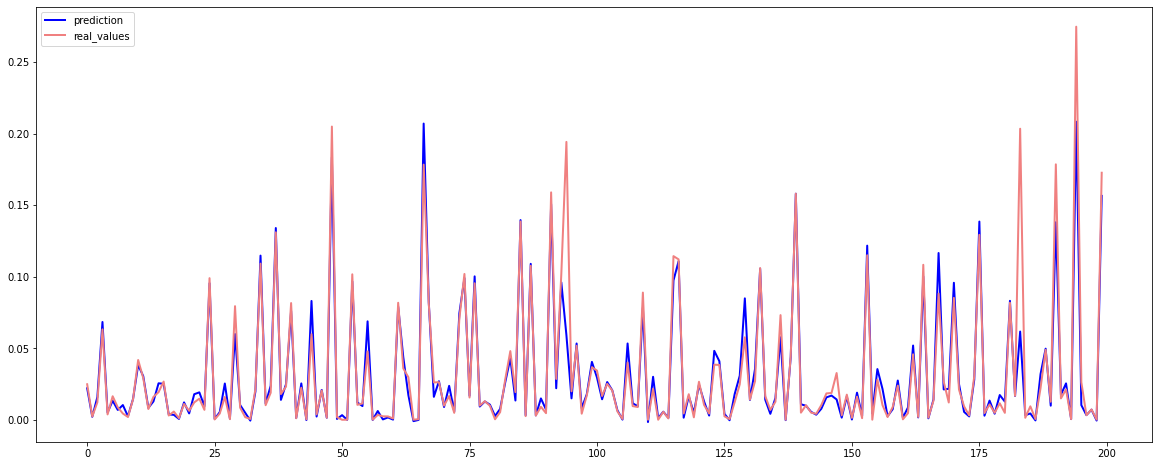

In [72]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In this linear regression model we got an accuracy is equal to 89.92% 

1. Mean squared error is 0.0001 
2. Mean absolute error is 0.0040


# **Random Forest Regressor Model**

Random Forest Regression is a supervised learning algorithm that uses ensemble 
learning method for regression. Ensemble learning method is a technique that combines predictions 
from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [73]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  96.96031982883977


In [75]:
y_pred = rf.predict(X_test)

In [76]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.0019893418119354524
MSE 3.289641121147957e-05
RMSE 0.005735539313044552
R2 0.969603353533281


In [77]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
Date,,
2010-03-05,0.024841,0.025476
2011-05-06,0.002283,0.002182
2011-11-04,0.012251,0.013512
2010-08-06,0.063197,0.065108
2010-10-22,0.003760,0.003735
...,...,...
2010-09-17,0.000795,0.000787
2011-12-23,0.000204,0.000140
2011-03-25,0.042487,0.043437


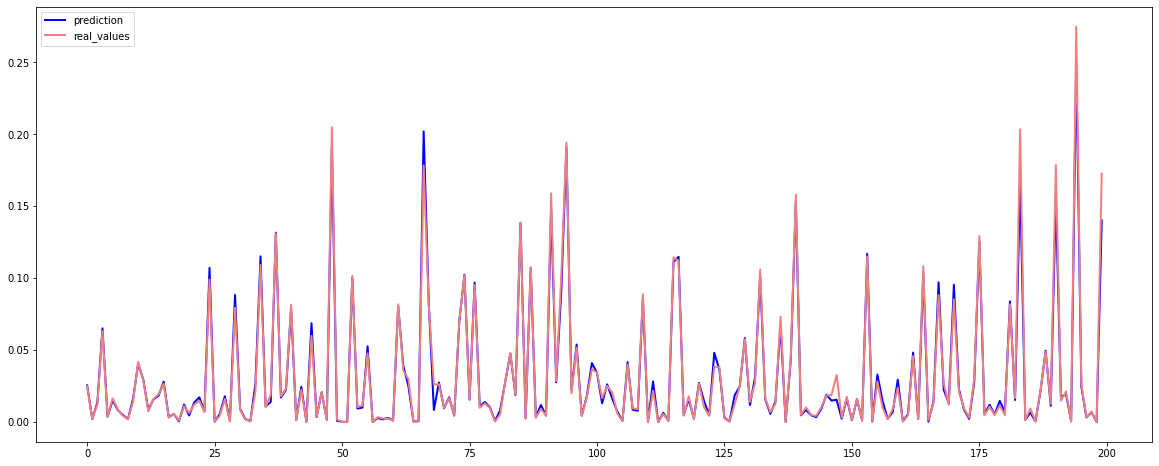

In [78]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

plt.show()

In this model we got an accuracy is equal to 97.17% 
1.   Mean squared error is 3.0522 
2.   Mean absolute error is 0.0019 




# **K Neighbors Regressor Model**

KNN regression is a non-parametric method that, in an intuitive manner, approximates the 
association between independent variables and the continuous outcome by averaging the 
observations in the same neighbourhood. The size of the neighbourhood needs to be set by the 
analyst or can be chosen using cross-validation (we will see this later) to select the size that 
minimises the mean-squared error. 


In [79]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [80]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  95.65090546890357


In [81]:
y_pred = knn.predict(X_test)

In [82]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.0026751058263554364
MSE 4.706732091420527e-05
RMSE 0.006860562725768585
R2 0.9565090547251649


In [83]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

knn_df

,Actual,Predicted
Date,,
2010-03-05,0.024841,0.035043
2011-05-06,0.002283,0.003160
2011-11-04,0.012251,0.012928
2010-08-06,0.063197,0.054722
2010-10-22,0.003760,0.003988
...,...,...
2010-09-17,0.000795,0.000674
2011-12-23,0.000204,0.000186
2011-03-25,0.042487,0.045534


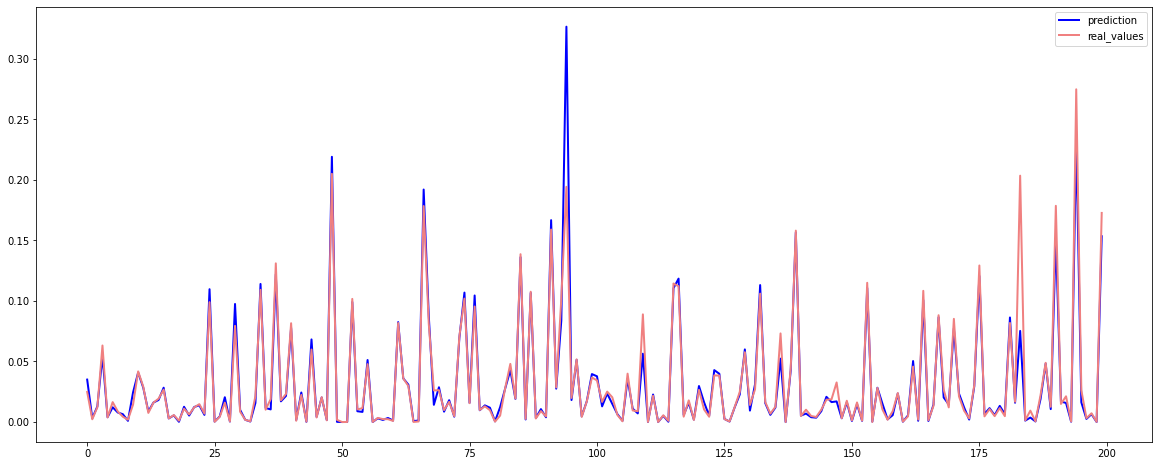

In [84]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In this model we got an accuracy is equal to 95.65%
Mean squared error is 4.7067 
1.  Mean squared error is 4.7067 
2.  Mean absolute error is 0.0026




# **XGboost Model**

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradientboosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the 
leading machine learning library for regression, classification, and ranking problems.

In [85]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

[19:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [86]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  93.1650359423767


In [87]:
y_pred = xgbr.predict(X_test)

In [88]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.0035786523855412073
MSE 7.397021252056146e-05
RMSE 0.00860059373070031
R2 0.9316544116509816


In [89]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

,Actual,Predicted
Date,,
2010-03-05,0.024841,0.021783
2011-05-06,0.002283,0.002190
2011-11-04,0.012251,0.012740
2010-08-06,0.063197,0.067401
2010-10-22,0.003760,0.003655
...,...,...
2010-09-17,0.000795,0.000387
2011-12-23,0.000204,0.004422
2011-03-25,0.042487,0.048067


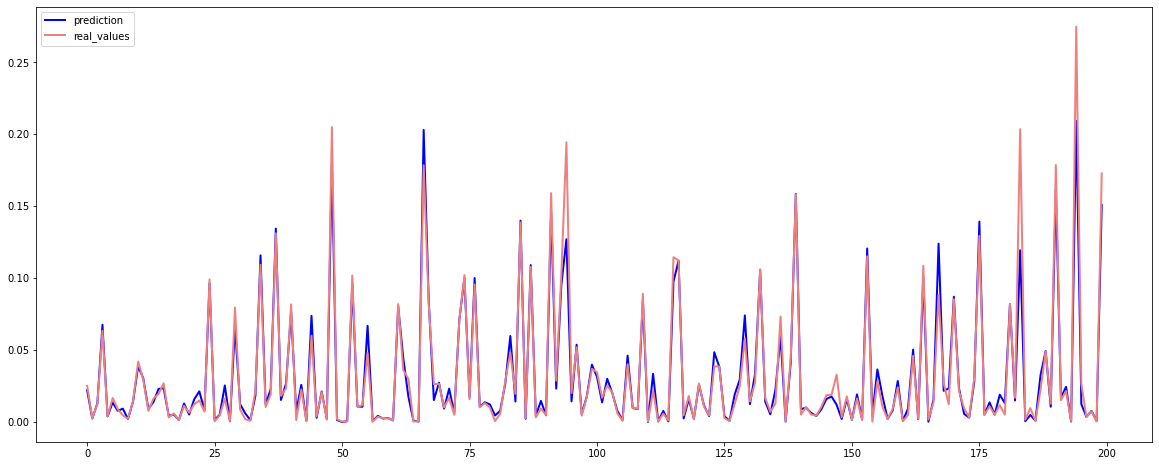

In [90]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In this model we got an accuracy is equal to 93.16% 
1.   Mean squared error is 7.3970 
2.   Mean absolute error is 0.0035List item



# **Comparing Models**

In [91]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc]}

In [92]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,89.926282
1,rf_acc,96.960320
2,knn_acc,95.650905
3,xgb_acc,93.165036


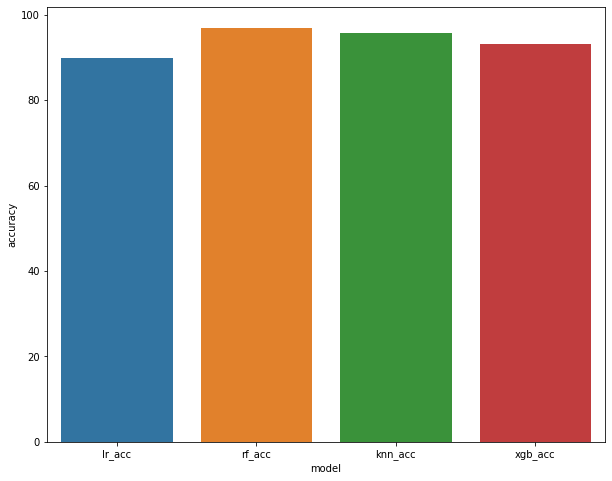

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()

From above figures we can see that random forest regression model has the highest accuracy 
Which is 97.17 % 
So we will use random forest regression model for sales prediction of this Walmart datasets 
Other models also perform well as there accuracies are: 
1. Linear regression = 89.92 % 
2. KNN Regression = 95.65 % 
3. XGBoost regression = 93.16 %


